<a href="https://colab.research.google.com/github/Anali24/SIMULACION-I/blob/main/Composicion_SI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Método de Composición***

In [191]:
import numpy as np
import matplotlib.pyplot as plt

Dada $f(x)$ dada por la gráfica:
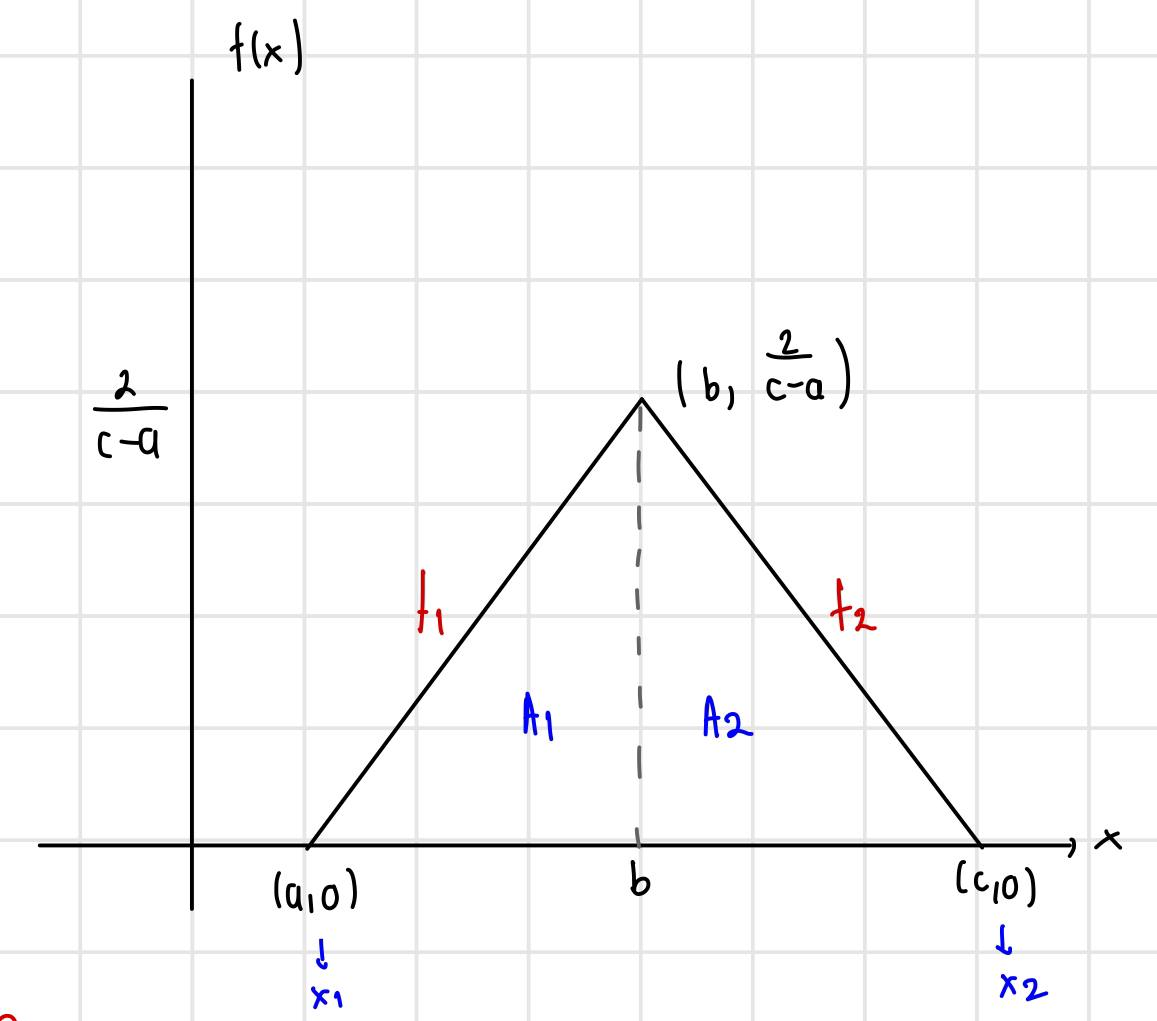


Dividimos $f(x)$ en 2 partes, donde tendremos 2 pesos.

$ \implies f(x) = f_1(x) + f_1(x)$

$f_1(x) = \frac{2}{(c-a)(b-a)} $ con $ a \leq x< b$

y

$f_2(x) = \frac{2(x-c)}{(c-a)(b-c)} $

In [192]:
#Damos valores a: a,b,c
a=20
b=30
c=40

In [193]:
def f(x,a,b,c):
  #Veamos si con los valores dados pertenece a f1 o f2
  if a<=x<b:
    return (2*(x-a)/((c-a)*(b-a))) #Función f1
  elif b<=x<=c:
    return (2*(x-c)/((c-a)*(b-c))) #Función f2
  else:
    return 0

In [194]:
#Calculamos áreas:
A1= (b-a)/(c-a)
A2= (c-b)/(c-a)
print(A1,A2)

0.5 0.5


In [195]:
# Genera un array de 1,000,000 puntos equiespaciados entre a y c.
x_vals = np.linspace(a, c, 1000000)

# Crea una lista y_vals donde cada elemento es el resultado de la función f(x, a, b, c)
# para cada valor de x en x_vals.
y_vals = [f(x, a, b, c) for x in x_vals]

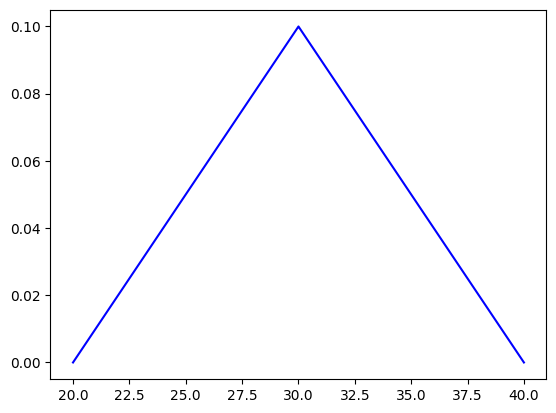

In [196]:
#Gráficamos nuestra fdp
plt.plot(x_vals, y_vals, color='blue')
plt.show()

Calculamos F(x) que corresponde a la Acumulada dada por:

$F(x) = \int_{-\infty}^{x} f(s)ds$

In [197]:
#Función Acumulada
def F(x,a,b,c):
  if x<a:
    return 0
  elif a<=x<b:
    return ((x-a)**2/((c-a)*(b-a))) #Revisamos si pertenece a nuestra acumulada
  elif b<=x<=c:
    return 1-(c-x)**2/((c-a)*(c-b)) #Revisamos si pertenece a la segunda parte de la acumulada
  elif x>c:
    return 1

In [198]:
x1_vals = np.linspace(a, c, 1000000)
y1_vals = [F(x,a,b,c) for x in x1_vals]

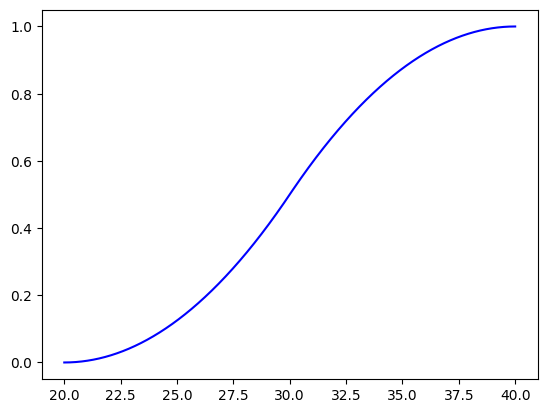

In [199]:
plt.plot(x1_vals, y1_vals, color='blue')
plt.show()

Para calcular \( x \) a partir de \( U \), donde
$
\frac{(x-a)^2}{(c-a)(b-a)} = U,
$

la solución para \( x \) es dada por:

$
x = a \pm \sqrt{2aU(c-a)(b-a)}.
$

Para despejar $ x $ de la ecuación:
$
1 - \frac{(c-x)^2}{(c-a)(c-b)} = U,
$

donde $ U $ es una variable aleatoria uniforme en el intervalo  [0, 1] , la solución para  x  es dada por:

$
x = c \pm \sqrt{2cU(c-a)(c-b)}.
$

In [200]:
def composicion(n, a, b, c):
    muestras = []
    for _ in range(n):
        U = np.random.uniform(0, 1)

        if U <= 0.5:
            # Generar x usando f1(x) en [a, b]
            x = a + np.sqrt(2 * a * U * (c - a) * (b - a))
        else:
            # Generar x usando f2(x) en [b, c]
            x = c - np.sqrt(2 * c * (1 - U) * (c - a) * (c - b))

        muestras.append(x)

    return muestras


In [201]:
# Generamos la muestra
# Definimos los parámetros
a = 20
b = 30
c = 40
n = 100
muestra = composicion(n, a, b, c)

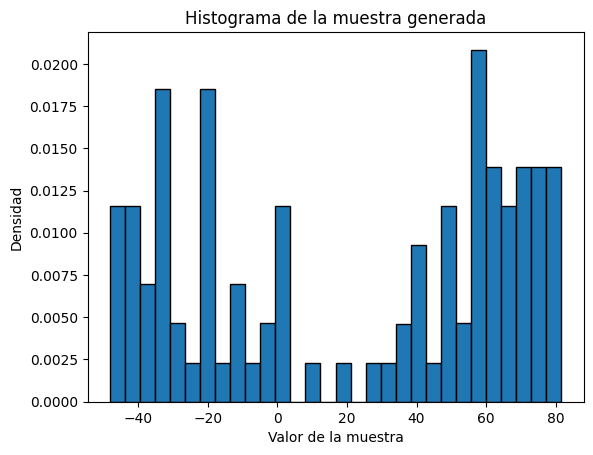

In [202]:
# Graficamos el histograma de los valores generados
plt.hist(muestra, bins=30, edgecolor='black', density=True)
plt.title('Histograma de la muestra generada')
plt.xlabel('Valor de la muestra')
plt.ylabel('Densidad')
plt.show()